In [1]:
import pandas as pd

df = pd.read_csv('/content/data_commuter.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No. Responden   384 non-null    int64  
 1   A.1             384 non-null    int64  
 2   A.2             384 non-null    int64  
 3   A.3             384 non-null    int64  
 4   A.4             384 non-null    int64  
 5   A.5             384 non-null    int64  
 6   A.6             384 non-null    int64  
 7   B.1             384 non-null    int64  
 8   B.2             384 non-null    int64  
 9   C.1             384 non-null    int64  
 10  C.2             384 non-null    int64  
 11  C.3             384 non-null    int64  
 12  C.4             384 non-null    float64
 13  D.1             384 non-null    int64  
 14  D.2             384 non-null    int64  
 15  D.3             384 non-null    int64  
 16  D.4             384 non-null    int64  
 17  D.5             384 non-null    flo

In [ ]:
df.head()

,No. Responden,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,...,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8,Kepuasan Hidup
0,1,1,30,1,3,1,1,4,4,1,...,5,4,3,4,4,4,3,3,3,Sangat Tidak Puas
1,2,1,40,1,3,1,5,4,5,2,...,4,4,3,4,4,5,4,4,5,Sangat Tidak Puas
2,3,1,38,1,3,1,5,4,4,1,...,5,5,4,4,3,3,3,3,4,Sangat Tidak Puas
3,4,1,27,2,3,1,5,5,4,2,...,4,4,5,5,4,3,4,5,4,Sangat Tidak Puas
4,5,2,28,2,3,1,5,5,5,3,...,4,4,4,5,3,4,5,5,4,Sangat Tidak Puas


In [3]:
df['Kepuasan Hidup'].replace(['Sangat Puas', 'Biasa', 'Sangat Tidak Puas'], [0,1,2], inplace=True)

In [4]:
df.head()

,No. Responden,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,...,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8,Kepuasan Hidup
0,1,1,30,1,3,1,1,4,4,1,...,5,4,3,4,4,4,3,3,3,2
1,2,1,40,1,3,1,5,4,5,2,...,4,4,3,4,4,5,4,4,5,2
2,3,1,38,1,3,1,5,4,4,1,...,5,5,4,4,3,3,3,3,4,2
3,4,1,27,2,3,1,5,5,4,2,...,4,4,5,5,4,3,4,5,4,2
4,5,2,28,2,3,1,5,5,5,3,...,4,4,4,5,3,4,5,5,4,2


In [5]:
from sklearn.cluster import KMeans


#Membuat list yg berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(df)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

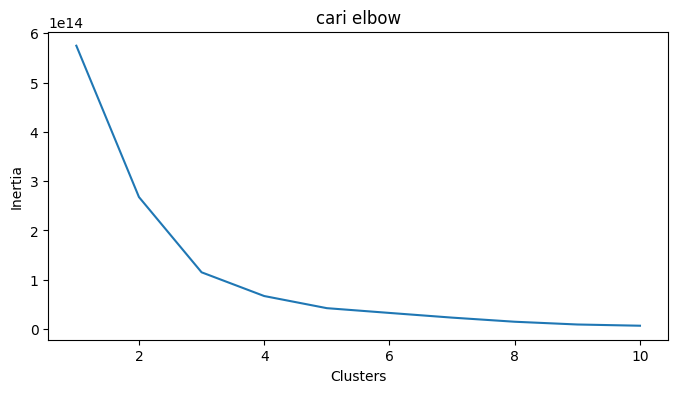

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Buat plot Inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)

ax.set_title('cari elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


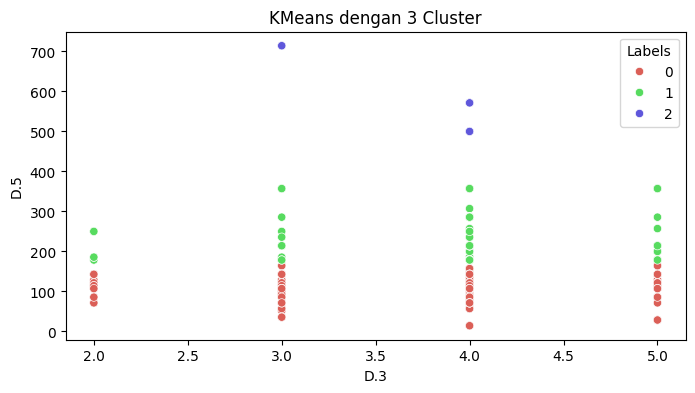

In [28]:
#Buat dulu objek KMeans
km3 = KMeans(n_clusters=3).fit(df)

#Menambahkan kolom label pada data set
df['Labels'] = km3.labels_

#Buat plot kmeans dgn klster 3
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['D.3'], y=df['D.5'], hue=df['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans dengan 3 Cluster')
plt.show()